In [ ]:
pip install gym

In [ ]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [ ]:
env = gym.make('FrozenLake-v1' )

In [ ]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
num_episodes = 10000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [ ]:
rewards_all_episodes = []

In [ ]:
for episode in range(num_episodes):
    state = env.reset()
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):

    # Exploration-exploitation trade-off
      exploration_rate_threshold = random.uniform(0, 1)
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = env.action_space.sample()
      new_state, reward, done,  info = env.step(action)
      q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
      learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

      state = new_state
      rewards_current_episode += reward

      if done == True:
        break
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    rewards_all_episodes.append(rewards_current_episode)





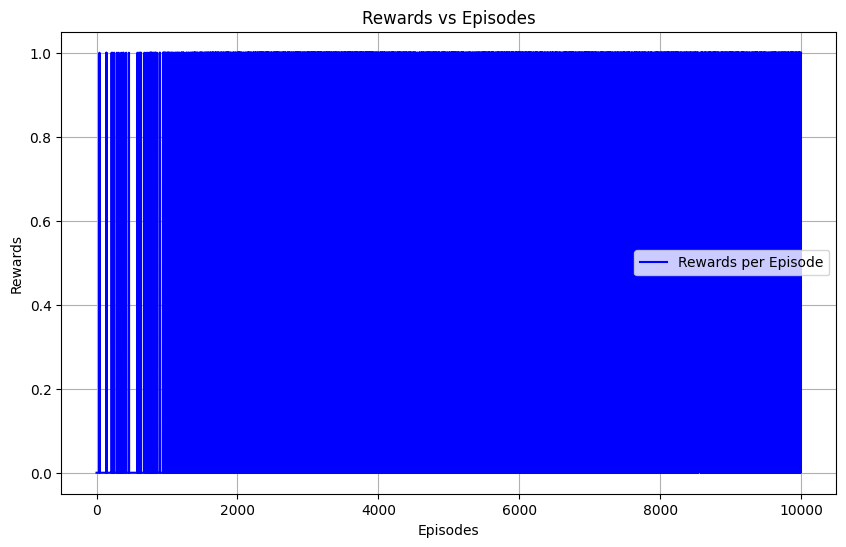

In [49]:
import matplotlib.pyplot as plt

# Assuming rewards_all_episodes is a list containing the reward for each episode
# and the number of episodes is len(rewards_all_episodes)

episodes = range(len(rewards_all_episodes))

# Plotting the rewards vs episodes
plt.figure(figsize=(10, 6))
plt.plot(episodes, rewards_all_episodes, label="Rewards per Episode", color='blue')
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Rewards vs Episodes")
plt.legend()
plt.grid(True)
plt.show()


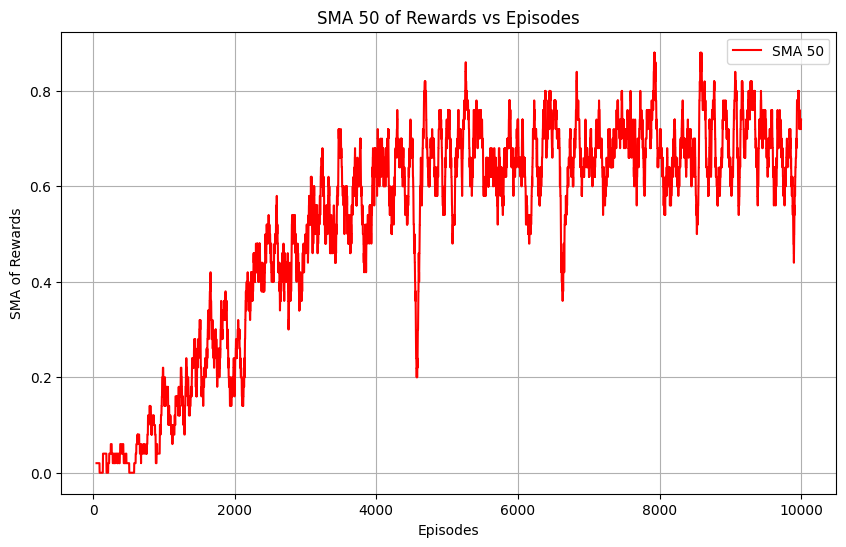

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rewards_all_episodes is a list of rewards over episodes

# Calculate the 50-period Simple Moving Average (SMA)
window_size = 50
sma_50 = np.convolve(rewards_all_episodes, np.ones(window_size)/window_size, mode='valid')

# Adjust the episodes range to match the length of the SMA
episodes = range(window_size - 1, len(rewards_all_episodes))

# Plotting the SMA 50
plt.figure(figsize=(10, 6))
plt.plot(episodes, sma_50, label="SMA 50", color='red')
plt.xlabel("Episodes")
plt.ylabel("SMA of Rewards")
plt.title("SMA 50 of Rewards vs Episodes")
plt.legend()
plt.grid(True)
plt.show()


In [53]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000


********Average reward per thousand episodes********

1000 :  0.04900000000000004
2000 :  0.21100000000000016
3000 :  0.4090000000000003
4000 :  0.5630000000000004
5000 :  0.6220000000000004
6000 :  0.6680000000000005
7000 :  0.6520000000000005
8000 :  0.6960000000000005
9000 :  0.6710000000000005
10000 :  0.6940000000000005


In [ ]:
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.55146624 0.49373741 0.4884622  0.4929348 ]
 [0.3554057  0.368258   0.36352756 0.50336015]
 [0.41587922 0.42109001 0.39457443 0.45737191]
 [0.32870705 0.21693772 0.28720147 0.43848279]
 [0.57500418 0.39560154 0.3740288  0.36881362]
 [0.         0.         0.         0.        ]
 [0.20852184 0.20480307 0.36681603 0.18007192]
 [0.         0.         0.         0.        ]
 [0.44556453 0.29716155 0.49030313 0.62957354]
 [0.4022793  0.67272886 0.47010749 0.43610828]
 [0.65843349 0.47365789 0.38396163 0.31367854]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.44751636 0.38158383 0.75593953 0.38201396]
 [0.73761453 0.92334468 0.74700708 0.74062933]
 [0.         0.         0.         0.        ]]


In [ ]:
for episode in range(10):
    state = env.reset()
    done = False
    print("*****EPISODE ", episode + 1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)

        action = np.argmax(q_table[state, :])
        new_state, reward, done, info = env.step(action)

        if done:
            clear_output(wait=True)
            env.render()

            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print("****You fell through a hole!****")
                time.sleep(3)

            clear_output(wait=True)
            break

        state = new_state

env.close()

****You reached the goal!****
